In [11]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_19293e0481ef40d68b5d2e35e4910dd2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OuWB6KVmkXdFF5Yb00ClviXibOyPmO0VpM3I2br0C-KV',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_19293e0481ef40d68b5d2e35e4910dd2.get_object(Bucket='telecomchurn-donotdelete-pr-sckqzztrduo3ra',Key='TelCustomerChurn.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()



,customerID,gender,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,TechSupport,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,1,No,Nophoneservice,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,34,Yes,No,DSL,Yes,No,No,One year,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,2,Yes,No,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,45,No,Nophoneservice,DSL,Yes,Yes,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,2,Yes,No,Fiber optic,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


In [13]:
replace_cols = ['OnlineSecurity',
                'TechSupport','StreamingTV']
for col in replace_cols:
    dataset[col] = dataset[col].replace({'No internet service': 'No'})

In [14]:
replace_cols1 = ['MultipleLines']
for col in replace_cols1:
    dataset[col] = dataset[col].replace({'Nophoneservice': 'No'})

In [15]:
dataset1=dataset.drop(['customerID'],axis=1)

In [16]:
#Converting Categorical to Numerical 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
dataset1['gender'] = le.fit_transform(dataset1['gender'])
dataset1['tenure'] = le.fit_transform(dataset1['tenure'])
dataset1['PhoneService'] = le.fit_transform(dataset1['PhoneService'])
dataset1['MultipleLines'] = le.fit_transform(dataset1['MultipleLines'])
dataset1['InternetService'] = le.fit_transform(dataset1['InternetService'])
dataset1['OnlineSecurity'] = le.fit_transform(dataset1['OnlineSecurity'])
dataset1['TechSupport'] = le.fit_transform(dataset1['TechSupport'])
dataset1['StreamingTV'] = le.fit_transform(dataset1['StreamingTV'])
dataset1['Contract'] = le.fit_transform(dataset1['Contract'])
dataset1['PaymentMethod'] = le.fit_transform(dataset1['PaymentMethod'])
dataset1['MonthlyCharges'] = le.fit_transform(dataset1['MonthlyCharges'])
dataset1['TotalCharges'] = le.fit_transform(dataset1['TotalCharges'])
dataset1['Churn'] = le.fit_transform(dataset1['Churn'])

In [18]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
gender             7043 non-null int64
tenure             7043 non-null int64
PhoneService       7043 non-null int64
MultipleLines      7043 non-null int64
InternetService    7043 non-null int64
OnlineSecurity     7043 non-null int64
TechSupport        7043 non-null int64
StreamingTV        7043 non-null int64
Contract           7043 non-null int64
PaymentMethod      7043 non-null int64
MonthlyCharges     7043 non-null int64
TotalCharges       7043 non-null int64
Churn              7043 non-null int64
dtypes: int64(13)
memory usage: 715.4 KB


In [19]:
dataset1.shape

(7043, 13)

In [20]:
dataset1.describe(include = 'all')

,gender,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,TechSupport,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,32.371149,0.903166,0.421837,0.872923,0.286668,0.290217,0.384353,0.690473,1.574329,683.524776,3257.794122,0.265370
std,0.500013,24.559481,0.295752,0.493888,0.737796,0.452237,0.453895,0.486477,0.833755,1.068104,478.511521,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,199.000000,1609.000000,0.000000
50%,1.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,722.000000,3249.000000,0.000000
75%,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1090.000000,4901.500000,1.000000
max,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1584.000000,6530.000000,1.000000


In [21]:
dataset1.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.0,0.0,1.0,1.0,1.0
tenure,7043.0,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043.0,0.903166,0.295752,0.0,1.0,1.0,1.0,1.0
MultipleLines,7043.0,0.421837,0.493888,0.0,0.0,0.0,1.0,1.0
InternetService,7043.0,0.872923,0.737796,0.0,0.0,1.0,1.0,2.0
OnlineSecurity,7043.0,0.286668,0.452237,0.0,0.0,0.0,1.0,1.0
TechSupport,7043.0,0.290217,0.453895,0.0,0.0,0.0,1.0,1.0
StreamingTV,7043.0,0.384353,0.486477,0.0,0.0,0.0,1.0,1.0
Contract,7043.0,0.690473,0.833755,0.0,0.0,0.0,1.0,2.0
PaymentMethod,7043.0,1.574329,1.068104,0.0,1.0,2.0,2.0,3.0


In [49]:
x = dataset1.iloc[:,0:12].values
y = dataset1.iloc[:,-1].values


In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 110)

In [51]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5,random_state = 10)
classifier = SVC(kernel = 'rbf')
classifier .fit(x_train, y_train)
y_pred = classifier.predict(x_test)
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm


array([[2584,   31],
       [ 821,   86]])

In [53]:
accuracy1 = metrics.accuracy_score(y_test, y_pred)
accuracy1

0.75809199318568998

In [54]:
x_test.shape

(3522, 12)

In [27]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

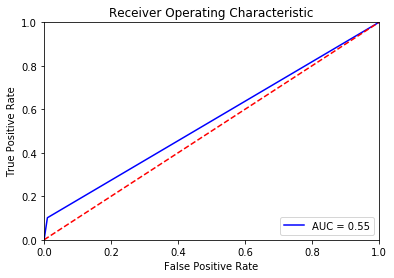

In [55]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
import pickle
s = pickle.dumps(classifier)

In [57]:
from sklearn.externals import joblib
joblib.dump(classifier, 'filename.pkl')

['filename.pkl']

In [58]:
get_ipython().system(u'pip install watson-machine-learning-client --upgrade')

Requirement already up-to-date: watson-machine-learning-client in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (1.0.365)
Requirement not upgraded as not directly required: ibm-cos-sdk in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2.0.1)
Requirement not upgraded as not directly required: urllib3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (1.22)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2.18.4)
Requirement not upgraded as not directly required: tqdm in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (4.19.5)
Requirement not upgraded as not directly required: certifi in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2019.3.9)
Requirement not upgraded as not dire

In [59]:
wml_credentials={
  "url":   "https://eu-gb.ml.cloud.ibm.com",
  "access_key": "7AD6umO3-2eqxCYYdrBI_sJnWjgadwCmKymxp04hbaHr",
  "username": "a8bdcf0b-de9b-4286-ba4c-232a8f322661",
  "password": "1ac63be9-e71b-4444-8569-2ef56e4dfe5c",
  "instance_id": "46d804b4-01f6-4bbc-b9c8-4cf5df4e6e8b"
}

In [60]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient
client = WatsonMachineLearningAPIClient(wml_credentials)

In [61]:
instance_details = client.service_instance.get_details()

In [62]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "IBM", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "pkgh1618@gmail.com", 
               client.repository.ModelMetaNames.NAME: "telecomchurn"}

In [63]:
model_artifact =client.repository.store_model(classifier, meta_props=model_props)

In [64]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [65]:
client.repository.list_models()

------------------------------------  ------------  ------------------------  -----------------
GUID                                  NAME          CREATED                   FRAMEWORK
c3f0473d-681f-4ce9-8652-1c0cf1fe3b86  telecomchurn  2019-06-21T06:06:30.702Z  scikit-learn-0.19
0c0c6361-4f8d-4c0d-860d-fbb3e90327e9  telecomchurn  2019-06-21T06:01:52.064Z  scikit-learn-0.19
251f33ae-88e5-4a3d-8cfb-1ecf1eaa9ceb  telecomchurn  2019-06-20T19:17:09.778Z  scikit-learn-0.19
00d8467e-2180-4ded-8123-1b9dc5f5f675  telecomchurn  2019-06-20T09:20:59.583Z  scikit-learn-0.19
------------------------------------  ------------  ------------------------  -----------------


In [66]:
loaded_model = client.repository.load(published_model_uid)


In [67]:
created_deployment = client.deployments.create(published_model_uid, name="telecomchurn")



#######################################################################################

Synchronous deployment creation for uid: 'c3f0473d-681f-4ce9-8652-1c0cf1fe3b86' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='ebc3eace-6d05-4a2e-be7d-a38011fd5c26'
------------------------------------------------------------------------------------------------




In [68]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)

In [69]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/46d804b4-01f6-4bbc-b9c8-4cf5df4e6e8b/deployments/ebc3eace-6d05-4a2e-be7d-a38011fd5c26/online'

In [70]:
client.deployments.list()

------------------------------------  ------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME          TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
ebc3eace-6d05-4a2e-be7d-a38011fd5c26  telecomchurn  online  DEPLOY_SUCCESS  2019-06-21T06:06:39.204Z  scikit-learn-0.19  model
9d18a74c-550e-494e-aa7b-5fa6f1302f4f  telecomchurn  online  DEPLOY_SUCCESS  2019-06-21T06:02:28.419Z  scikit-learn-0.19  model
3e532c64-1ecc-4b16-b884-42905b053a8f  telecomchurn  online  DEPLOY_SUCCESS  2019-06-20T19:17:29.439Z  scikit-learn-0.19  model
32092dbf-714c-470b-9358-e6deec1ea1f4  telecomchurn  online  DEPLOY_SUCCESS  2019-06-20T09:25:03.322Z  scikit-learn-0.19  model
------------------------------------  ------------  ------  --------------  ------------------------  -----------------  -------------


In [71]:
scoring_payload = {"fields": ["ge","tn","ps","ml","is","os","ts","st","co","pm","mc","tc"],"values": [[0,12,0,0,0,0,0,0,0,1,29.85,29.85]]}

In [72]:
predictions = client.deployments.score(scoring_endpoint, scoring_payload)

In [73]:
predictions

{'fields': ['prediction'], 'values': [[0]]}

In [74]:
x_test.shape

(3522, 12)